In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from mlxtend.evaluate import bias_variance_decomp

In [54]:
#We generate a dataset with 4 features, and two features who are actually informative.

X,y,c = make_regression(n_samples=10000,
                        n_informative = 5,
                        coef=True,
                        random_state=0,
                       shuffle = False)

In [55]:
# Testing on generated data

train_data, test_data, train_lbl, test_lbl = train_test_split( X, y, test_size=1/7.0, random_state=0)

# Without PCA

In [56]:
reg = LinearRegression().fit(train_data, train_lbl)

In [57]:
reg.score(test_data,test_lbl)

1.0

# After PCA

In [58]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_data)

# Apply transform to both the training set and the test set.
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [59]:
pca = PCA(0.95)

x_pca = pca.fit(train_data)

x_pca = pca.transform(train_data)

x_pca_test = pca.transform(test_data)

In [60]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 1.22,  2.43,  3.64,  4.83,  6.01,  7.18,  8.34,  9.5 , 10.65,
       11.8 , 12.94, 14.08, 15.22, 16.35, 17.48, 18.6 , 19.72, 20.83,
       21.94, 23.05, 24.15, 25.25, 26.34, 27.43, 28.51, 29.59, 30.67,
       31.74, 32.81, 33.88, 34.95, 36.01, 37.07, 38.12, 39.17, 40.22,
       41.26, 42.3 , 43.33, 44.36, 45.39, 46.42, 47.44, 48.46, 49.47,
       50.48, 51.49, 52.5 , 53.5 , 54.5 , 55.5 , 56.49, 57.47, 58.45,
       59.43, 60.41, 61.38, 62.35, 63.32, 64.28, 65.24, 66.2 , 67.15,
       68.1 , 69.05, 69.99, 70.93, 71.87, 72.81, 73.74, 74.67, 75.59,
       76.51, 77.43, 78.35, 79.26, 80.17, 81.08, 81.98, 82.88, 83.77,
       84.66, 85.54, 86.42, 87.3 , 88.18, 89.05, 89.92, 90.78, 91.64,
       92.49, 93.34, 94.18, 95.02])

Score for 1 components: 0.0005705214230669053
Score for 2 components: 0.0003558487062799154
Score for 3 components: 0.023571499190475076
Score for 4 components: 0.023359434610672025
Score for 5 components: 0.02443669357914957
Score for 6 components: 0.03149410264569685
Score for 7 components: 0.03509464804976725
Score for 8 components: 0.07260602014776907
Score for 9 components: 0.08664723201917712
Score for 10 components: 0.08633785444965003
Score for 11 components: 0.08960646923468019
Score for 12 components: 0.08963053461725257
Score for 13 components: 0.09664226884024496
Score for 14 components: 0.10516150029210669
Score for 15 components: 0.14682711248434588
Score for 16 components: 0.16241545352731113
Score for 17 components: 0.20076450892248365
Score for 18 components: 0.20106848810194755
Score for 19 components: 0.20152050059882265
Score for 20 components: 0.21545082810861937


<function matplotlib.pyplot.show(close=None, block=None)>

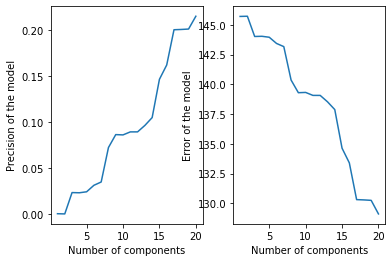

In [61]:
regr = LinearRegression()

scores = []
errors = []

for i in np.arange(1,21):
    regr.fit(x_pca[:,:i], train_lbl)
    
    score = regr.score(x_pca_test[:,:i],test_lbl)                                              
    print("Score for " + str(i) + " components: " + str(score))
    scores.append(score)
    
    pred = regr.predict(x_pca_test[:,:i])
    error = np.sqrt(mean_squared_error(test_lbl,pred))
    errors.append(error)    
    
plt.subplot(1,2,1)
plt.plot(np.arange(1,21),scores)
plt.xlabel('Number of components')
plt.ylabel('Precision of the model')


plt.subplot(1,2,2)
plt.plot(np.arange(1,21),errors)
plt.xlabel('Number of components')
plt.ylabel('Error of the model')

plt.show

## Real dataset

In [62]:
df_real = pd.read_csv (r'C:\Users\Kevin\Desktop\School\Master\Sem_2\SFML\Real estate.csv')
# https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction

dataframe = pd.DataFrame(df_real)

dataframe

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [64]:
y=dataframe['Y house price of unit area']
X=dataframe.drop(['Y house price of unit area'],axis=1)

train_data, test_data, train_lbl, test_lbl = train_test_split( X, y, test_size=1/7.0, random_state=0)

### Without PCA

In [66]:
reg = LinearRegression().fit(train_data, train_lbl)

reg.score(test_data,test_lbl)

0.6805241731225633

### With PCA

In [69]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_data)

# Apply transform to both the training set and the test set.
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [74]:
pca = PCA()

x_pca = pca.fit(train_data)

x_pca = pca.transform(train_data)

x_pca_test = pca.transform(test_data)

In [75]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 38.32,  53.89,  68.22,  81.75,  90.07,  97.96, 100.  ])

Score for 1 components: 0.5380915650446206
Score for 2 components: 0.5371738368290766
Score for 3 components: 0.6090101769908912
Score for 4 components: 0.645350354601799
Score for 5 components: 0.6611166215845988
Score for 6 components: 0.6550309425416265
Score for 7 components: 0.6805241731225711


<function matplotlib.pyplot.show(close=None, block=None)>

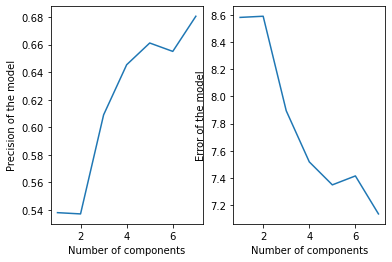

In [77]:
regr = LinearRegression()

scores = []
errors = []

for i in np.arange(1,8):
    regr.fit(x_pca[:,:i], train_lbl)
    
    score = regr.score(x_pca_test[:,:i],test_lbl)                                              
    print("Score for " + str(i) + " components: " + str(score))
    scores.append(score)
    
    pred = regr.predict(x_pca_test[:,:i])
    error = np.sqrt(mean_squared_error(test_lbl,pred))
    errors.append(error)    
    
plt.subplot(1,2,1)
plt.plot(np.arange(1,8),scores)
plt.xlabel('Number of components')
plt.ylabel('Precision of the model')


plt.subplot(1,2,2)
plt.plot(np.arange(1,8),errors)
plt.xlabel('Number of components')
plt.ylabel('Error of the model')

plt.show